* 시각화 패키지 : plotnine, folium

In [1]:
!pip install plotnine
!pip install folium
!pip show plotnine
!pip show folium

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for plotnine from https://files.pythonhosted.org/packages/5b/b5/fb81914804ad0d8e4a53118df343efdba1562de13275189cf2228ef8e3c1/plotnine-0.12.4-py3-none-any.whl.metadata
  Obtaining dependency information for mizani<0.10.0,>0.9.0 from https://files.pythonhosted.org/packages/e2/95/d4e33d3f5bc9fee5512637661208b6b595bda58e9b6a66fa867137761dd7/mizani-0.9.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 660.6 kB/s eta 0:00:02
   ------------ --------------------------- 0.4/1.3 MB 5.1 MB/s eta 0:00:01
   ----------------------------- ---------- 0.9/1.3 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/73.7 kB ? eta -:--:--
   ---------------------------------------- 73.7/73.7 kB ? eta 0

* 도시공원데이터는 `공공데이터포털`에서 다운로드
  - https://www.data.go.kr/dataset/15012890/standard.do

In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [6,2]

In [4]:
from plotnine import *
import folium
import re

In [9]:
park = pd.read_csv('../data/전국도시공원표준데이터.csv', encoding='euc-kr')
print(park.shape)
display(park.head(2))
print(park.info())

(16096, 20)


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,광주광역시 북구 문흥동 1009-1,35.184917,126.916686,87710.3,NaN,NaN,NaN,NaN,NaN,1990-12-31,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,광주광역시 북구 두암동 969-4,35.165104,126.937650,13383.5,NaN,NaN,NaN,NaN,NaN,1990-12-12,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          16096 non-null  object 
 1   공원명           16096 non-null  object 
 2   공원구분          16096 non-null  object 
 3   소재지도로명주소      8321 non-null   object 
 4   소재지지번주소       15213 non-null  object 
 5   위도            16096 non-null  float64
 6   경도            16096 non-null  float64
 7   공원면적          16096 non-null  float64
 8   공원보유시설(운동시설)  4164 non-null   object 
 9   공원보유시설(유희시설)  6085 non-null   object 
 10  공원보유시설(편익시설)  4344 non-null   object 
 11  공원보유시설(교양시설)  914 non-null    object 
 12  공원보유시설(기타시설)  2503 non-null   object 
 13  지정고시일         13512 non-null  object 
 14  관리기관명         15381 non-null  object 
 15  전화번호          14966 non-null  object 
 16  데이터기준일자       16096 non-null  object 
 17  제공기관코드        16096 non-null  object 
 18  제공기관명         16096 non-nu

In [15]:
# 데이터정제
display(park.isnull().head())
print(park.isnull().sum())  # or print(park.isna().sum())

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,True


관리번호                0
공원명                 0
공원구분                0
소재지도로명주소         7775
소재지지번주소           883
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    11932
공원보유시설(유희시설)    10011
공원보유시설(편익시설)    11752
공원보유시설(교양시설)    15182
공원보유시설(기타시설)    13593
지정고시일            2584
관리기관명             715
전화번호             1130
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     16096
dtype: int64


In [16]:
# null값의 시각화
!pip install missingno
!pip show missingno

Defaulting to user installation because normal site-packages is not writeable
Name: missingno
Version: 0.5.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: MIT License
Location: C:\Users\EZEN\AppData\Roaming\Python\Python311\site-packages
Requires: matplotlib, numpy, scipy, seaborn
Required-by: 


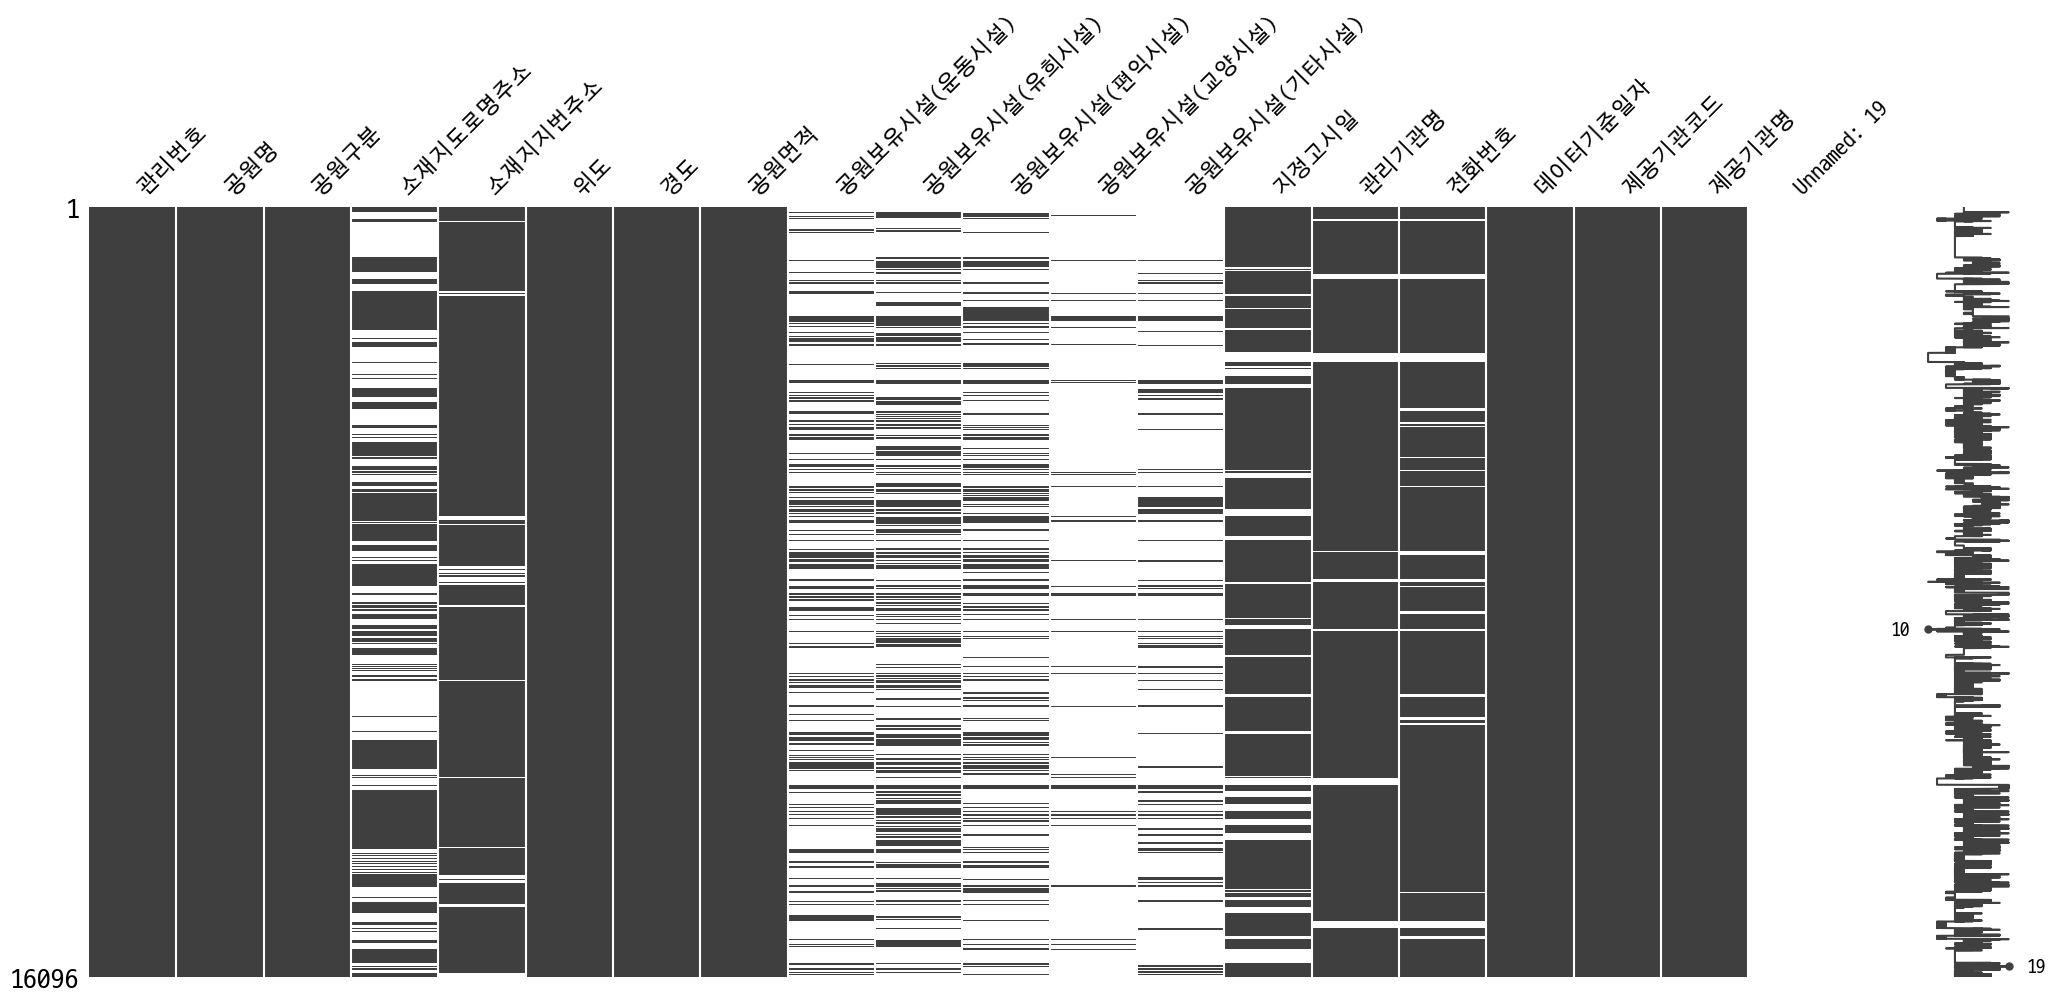

In [17]:
import missingno as msno
msno.matrix(park)
plt.show()

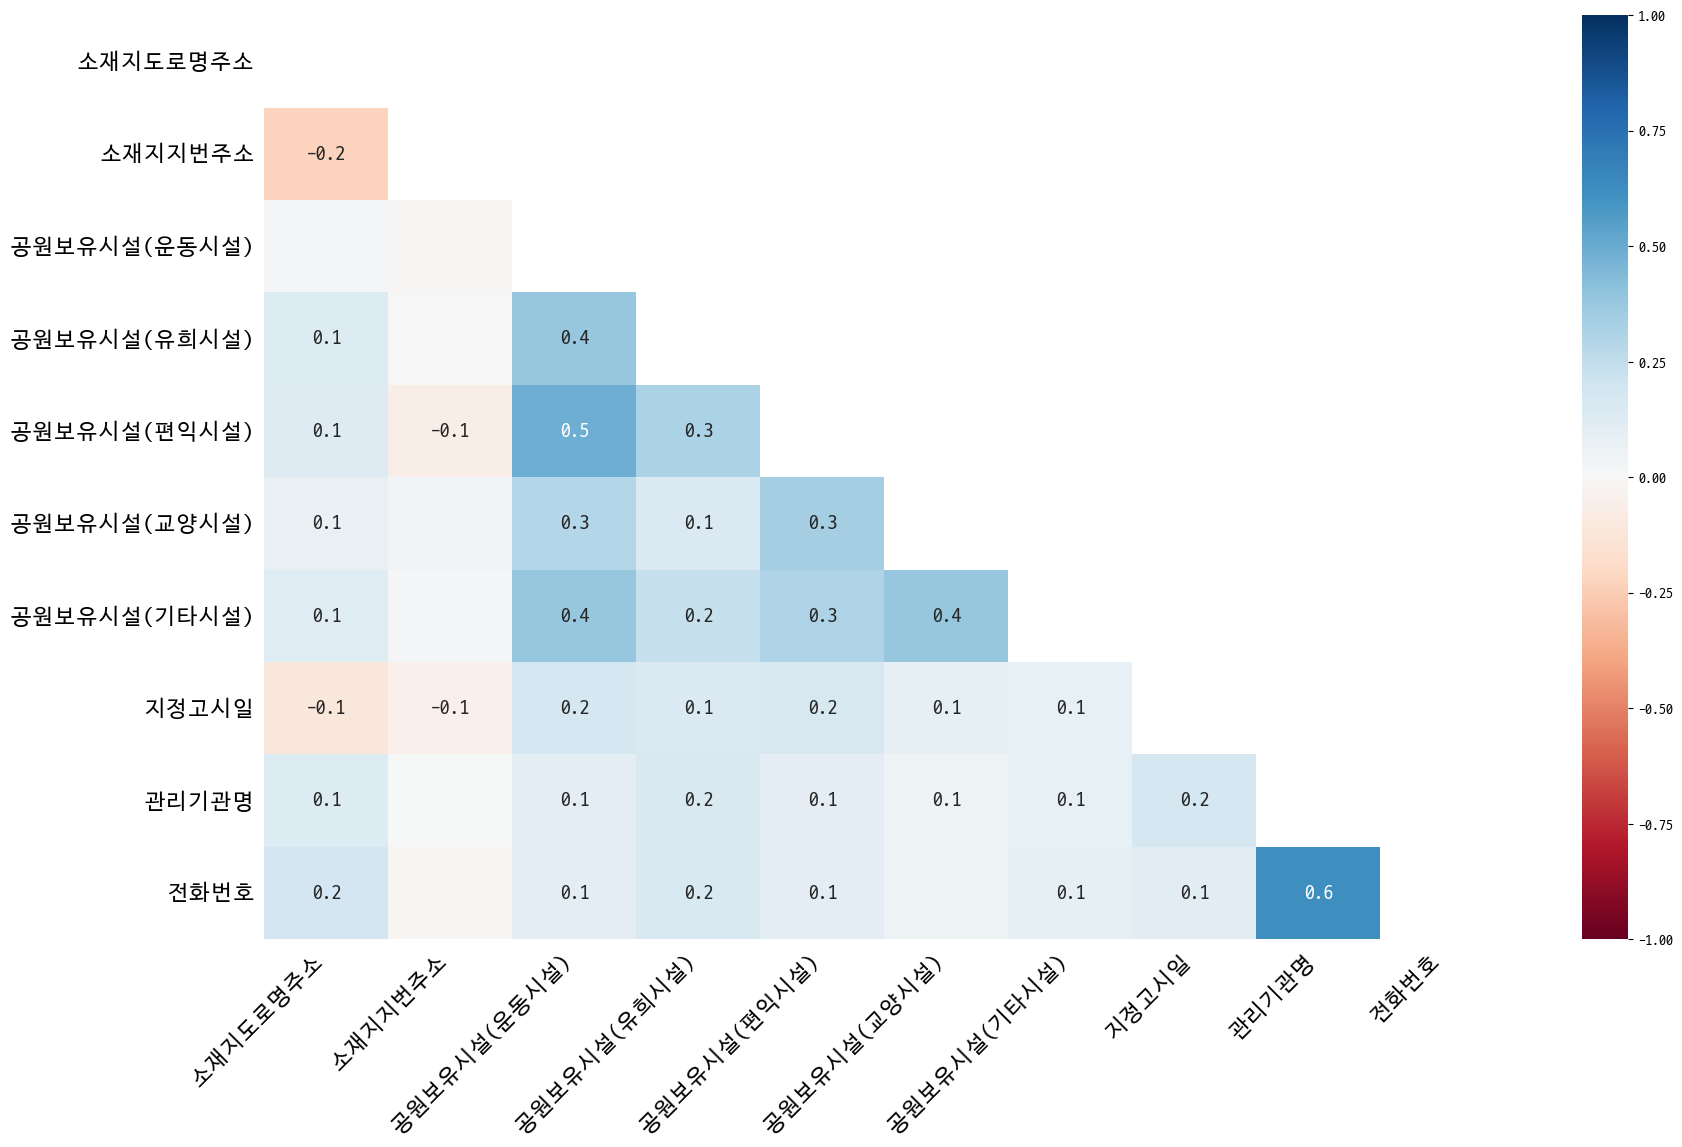

In [18]:
msno.heatmap(park)
plt.show()

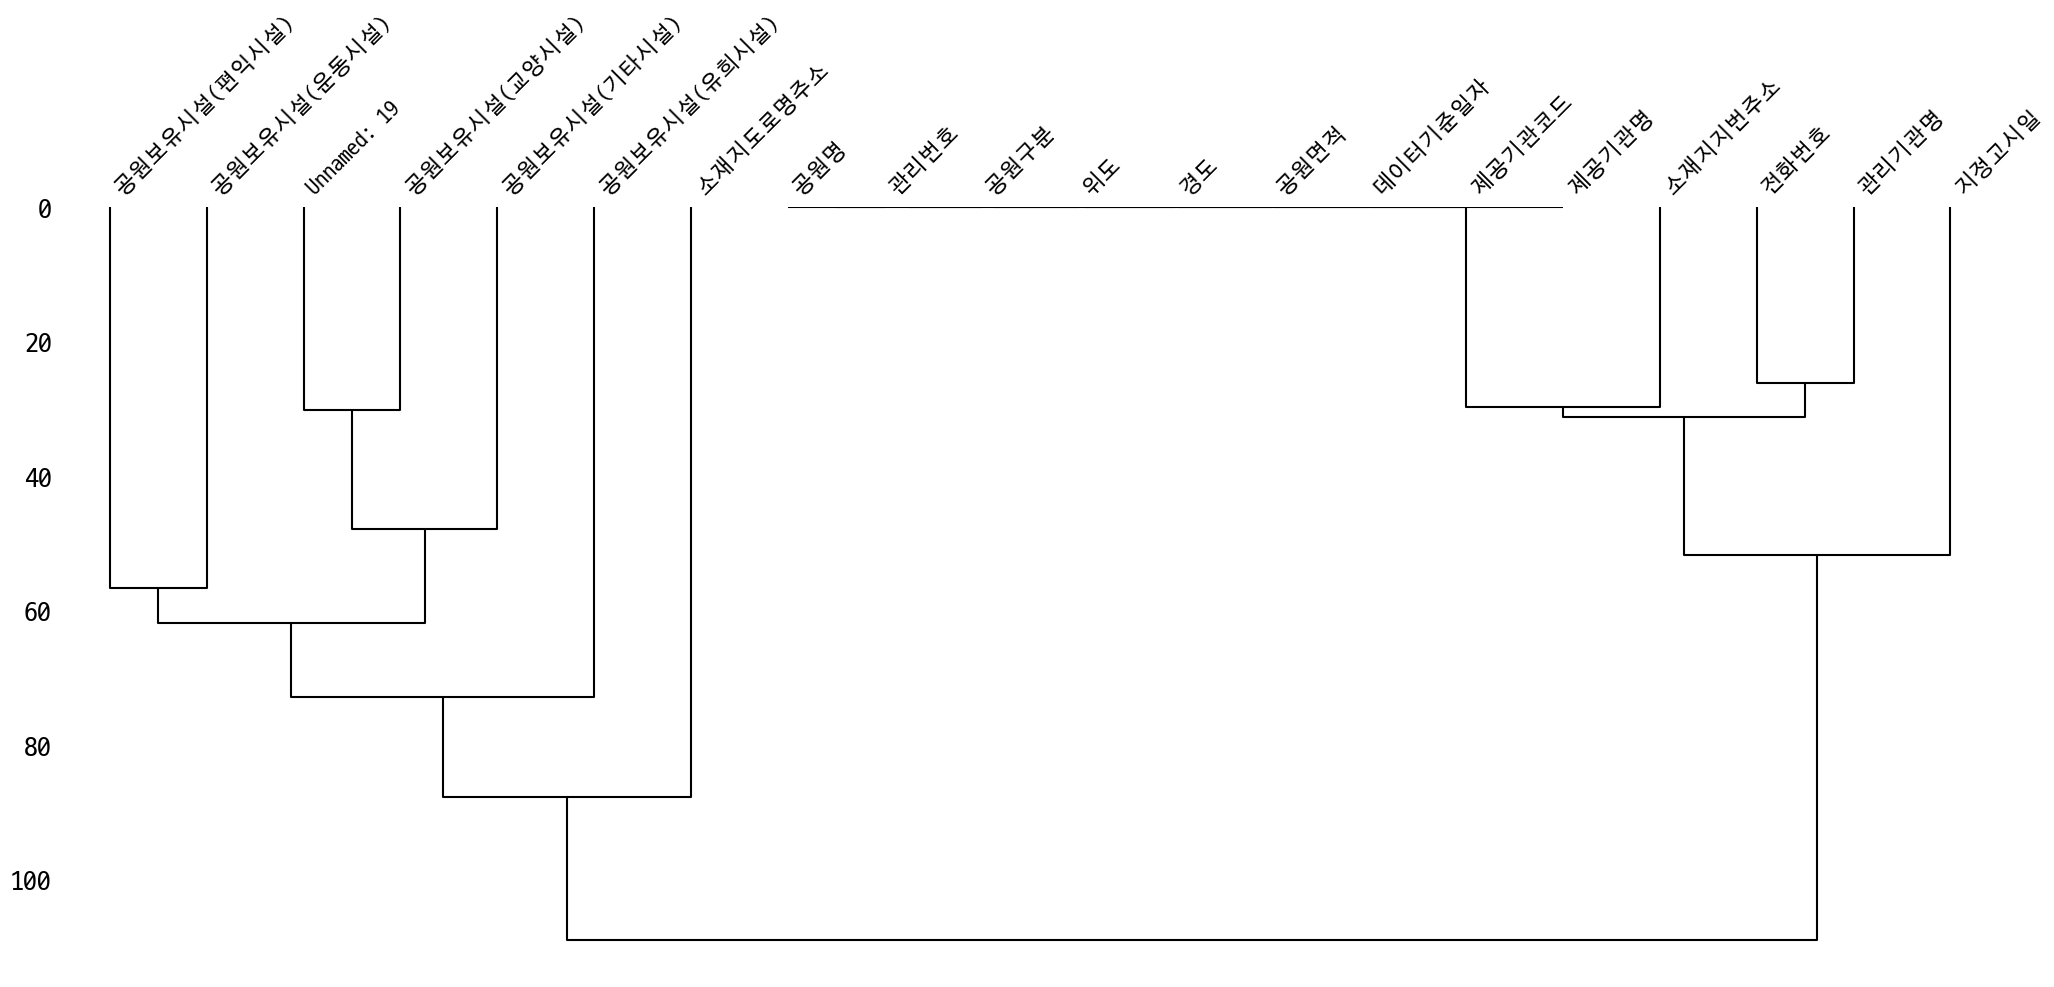

In [19]:
msno.dendrogram(park)
plt.show()

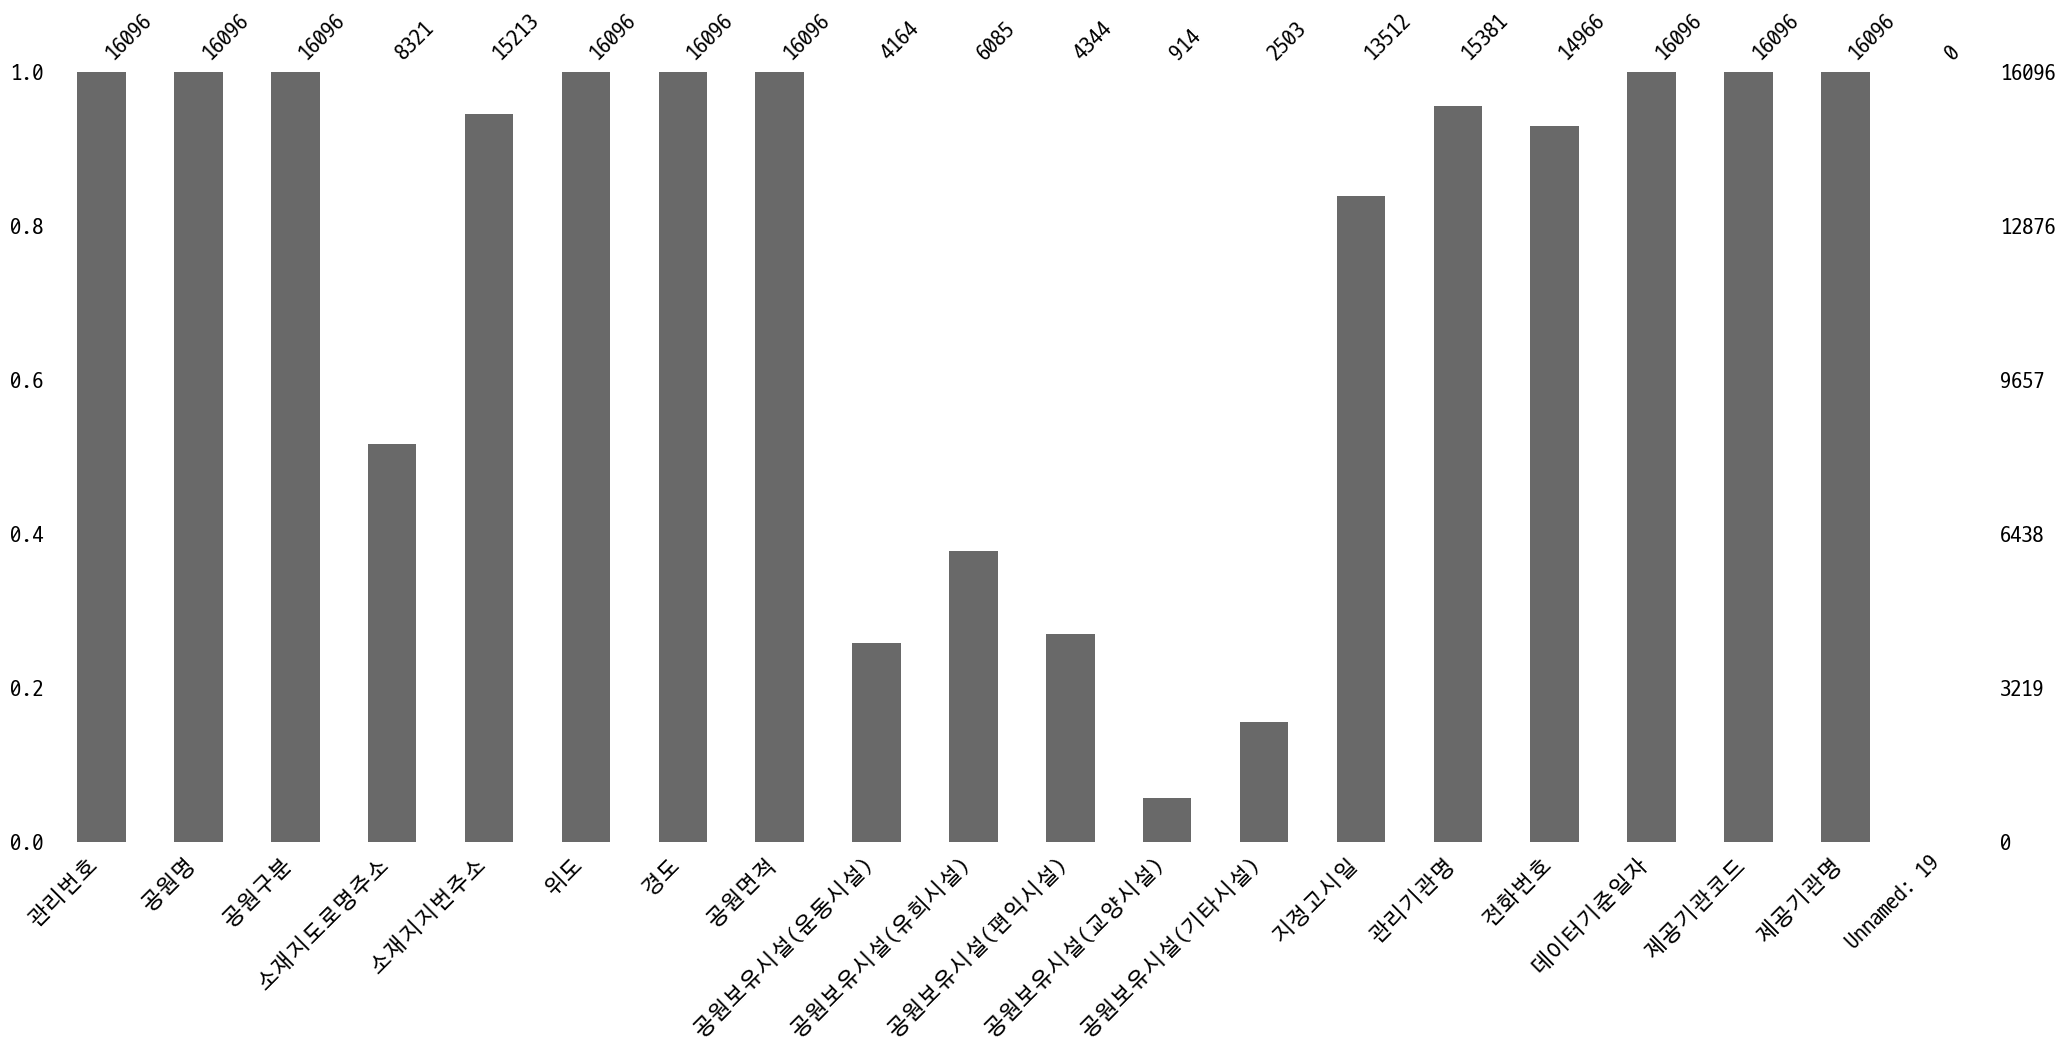

In [20]:
msno.bar(park)
plt.show()

In [22]:
display(park.head(1))
display(park.columns)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,광주광역시 북구 문흥동 1009-1,35.184917,126.916686,87710.3,NaN,NaN,NaN,NaN,NaN,1990-12-31,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN


Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [24]:
# 불필요한 컬럼은 제거
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)'
                   , '공원보유시설(교양시설)', '공원보유시설(기타시설)','지정고시일', '관리기관명'
                  ,'Unnamed: 19'], inplace=True)
display(park.columns)

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

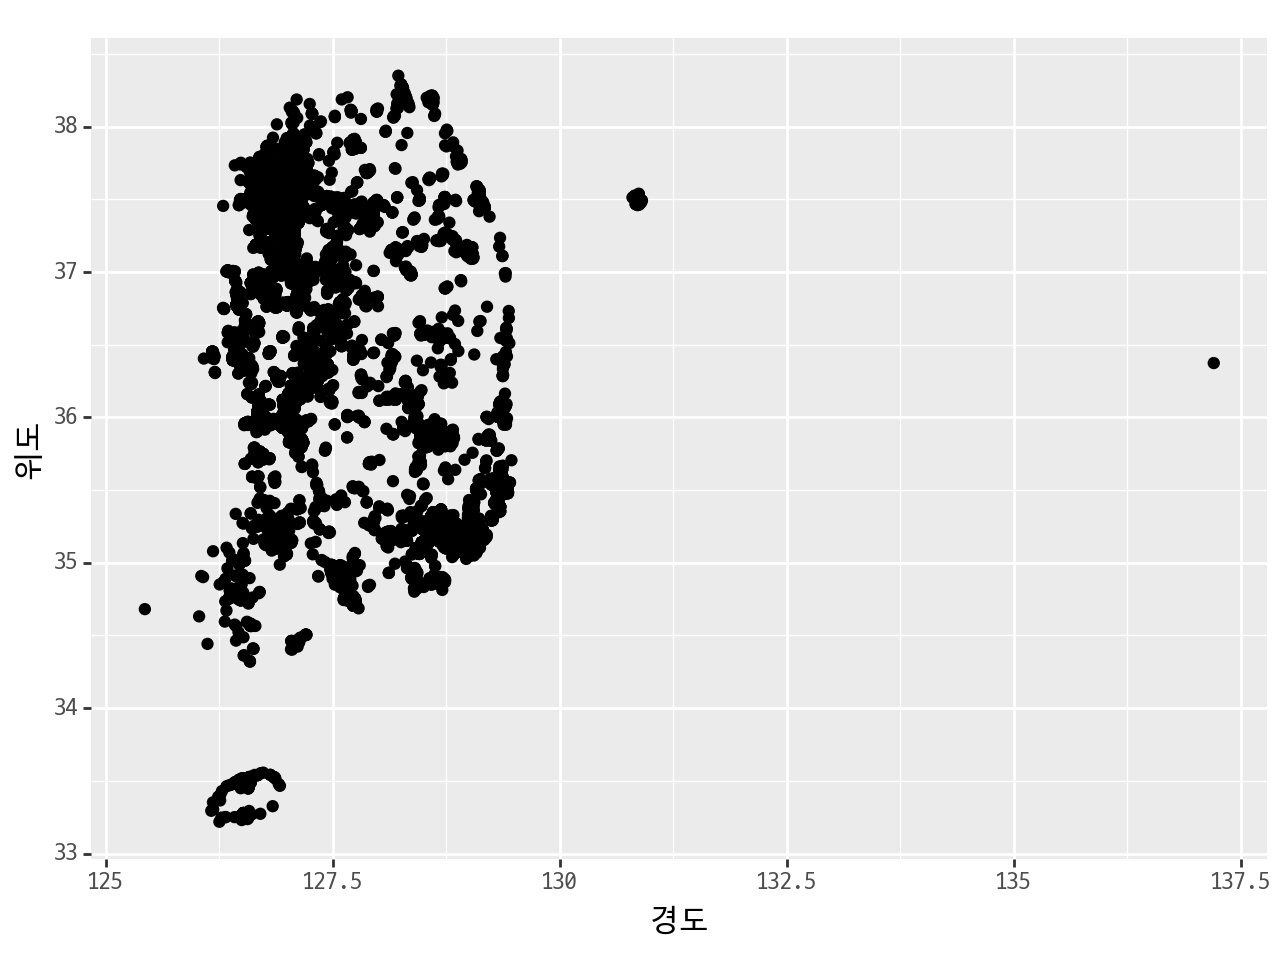

<Figure Size: (640 x 480)>

In [29]:
# 위도, 경도기준으로 시각화
(ggplot(park)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='D2Coding'))
)

In [34]:
# 데이터전처리
# 시도결측치
# 이상치
# 위경도 국내범위 벗어난 데이터 제거
# 실습1. 이상치확인하기
display(park[park.경도 > 132.5])
# 충청북도 청주시 흥덕구 오송읍 만수리 512 
# 실제위치: 36.6318651,127.3321636, 오류위치 : 36.374204, 137.202661
display(park[park.위도 > 38.5])
display(park[park.위도 < 33.0])

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
840,43113-00080,근린공원5(만수공원),근린공원,NaN,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,043-201-7233,2018-08-16,5710000,충청북도 청주시


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명


In [35]:
# 이차치제거
park = park.drop(index=840)
display(park.shape)
display(park[park.경도 > 132.5])

(16095, 12)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명


In [38]:
# 시각화 - 면적에 따른 크기(표준화, 조정, 열추가)
park['공원면적비율'] = park.공원면적.apply(lambda x:np.sqrt(x)*0.01)
park.공원면적비율.head()

0    2.961592
1    1.156871
2    4.134254
3    1.866556
4    1.015628
Name: 공원면적비율, dtype: float64

In [42]:
# 결측치 isnull(), sum()
display(park.소재지도로명주소.isnull().sum())
display(park.소재지지번주소.isnull().sum())

# 도로명과 지번수의 not null : notnull(), isnull()
park.loc[park.소재지도로명주소.isnull() & park.소재지지번주소.notnull()].shape

# 지번주소가 없는 데이터에다가 도로명주소를 채워주기, fillna()
park.소재지도로명주소.fillna(park.소재지지번주소, inplace=True)


7774

883

0

883

(0, 13)

<Axes: >

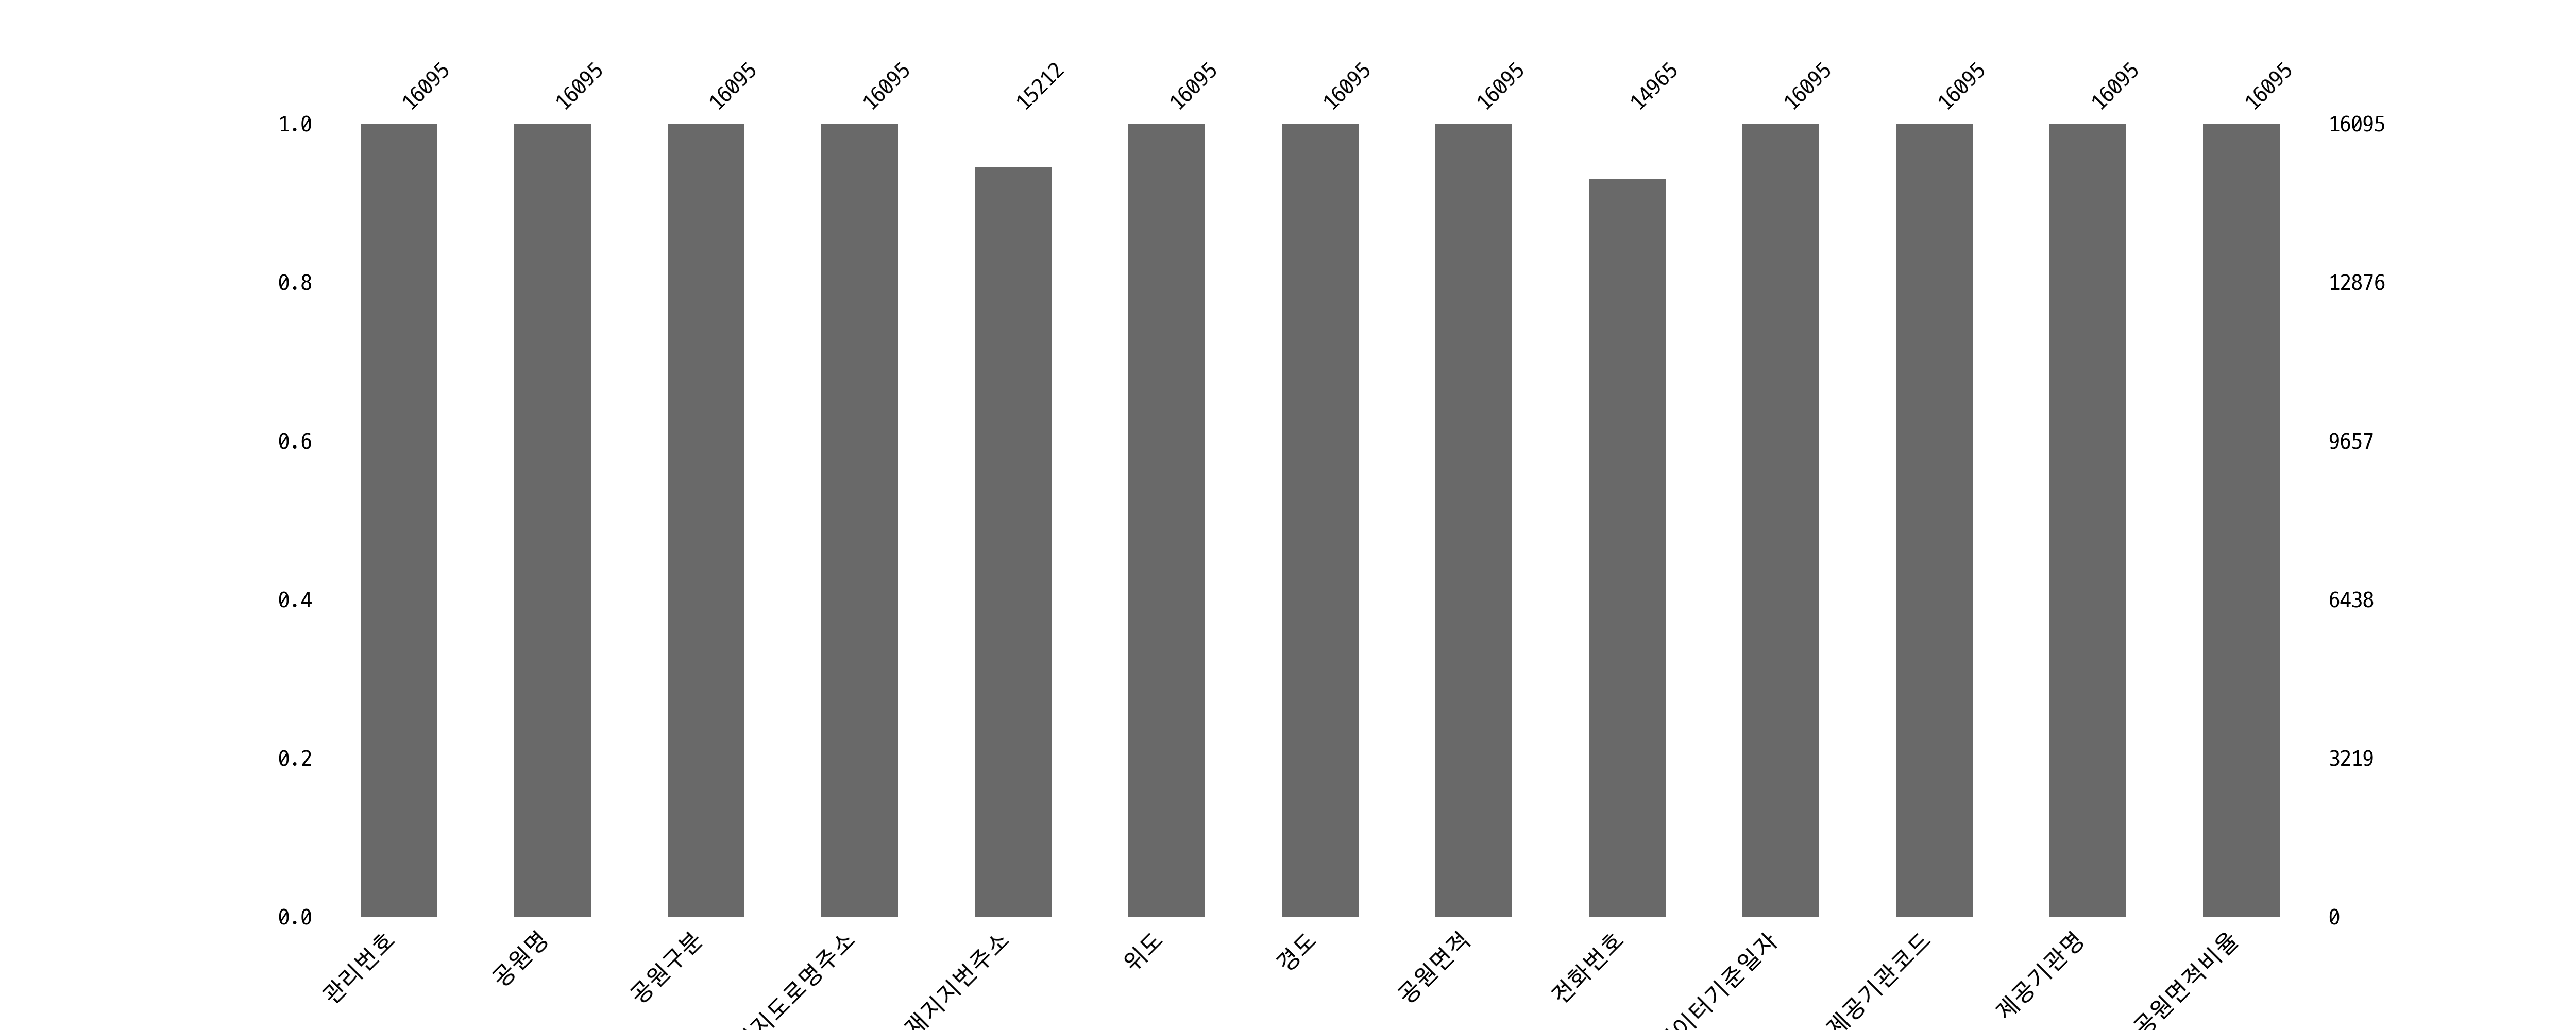

In [46]:
display(park.소재지도로명주소.isnull().sum())
display(park.소재지지번주소.isnull().sum())
park_loc = park.loc[park.소재지도로명주소.isnull() & park.소재지지번주소.notnull()]
display(park_loc.shape)
msno.bar(park)

In [51]:
# 주소에서 시도컬럼을 추가
park.소재지도로명주소.str.split(' ', expand=True)
park['시도'] = park.소재지도로명주소.str.split(' ', expand=True)[0]

# 구군
park['구군'] = park.소재지도로명주소.str.split(' ', expand=True)[1]

In [52]:
park.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16095 entries, 0 to 16095
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관리번호      16095 non-null  object 
 1   공원명       16095 non-null  object 
 2   공원구분      16095 non-null  object 
 3   소재지도로명주소  16095 non-null  object 
 4   소재지지번주소   15212 non-null  object 
 5   위도        16095 non-null  float64
 6   경도        16095 non-null  float64
 7   공원면적      16095 non-null  float64
 8   전화번호      14965 non-null  object 
 9   데이터기준일자   16095 non-null  object 
 10  제공기관코드    16095 non-null  object 
 11  제공기관명     16095 non-null  object 
 12  공원면적비율    16095 non-null  float64
 13  시도        16095 non-null  object 
 14  구군        16095 non-null  object 
dtypes: float64(4), object(11)
memory usage: 2.0+ MB


In [53]:
park.시도.value_counts()

시도
경기도        3250
경상남도       1814
충청남도       1708
서울특별시      1330
전라북도       1138
전라남도        925
충청북도        910
울산광역시       833
경상북도        785
강원도         724
대구광역시       580
부산광역시       530
인천광역시       507
대전광역시       384
광주광역시       362
제주특별자치도     245
세종특별자치시      70
Name: count, dtype: int64

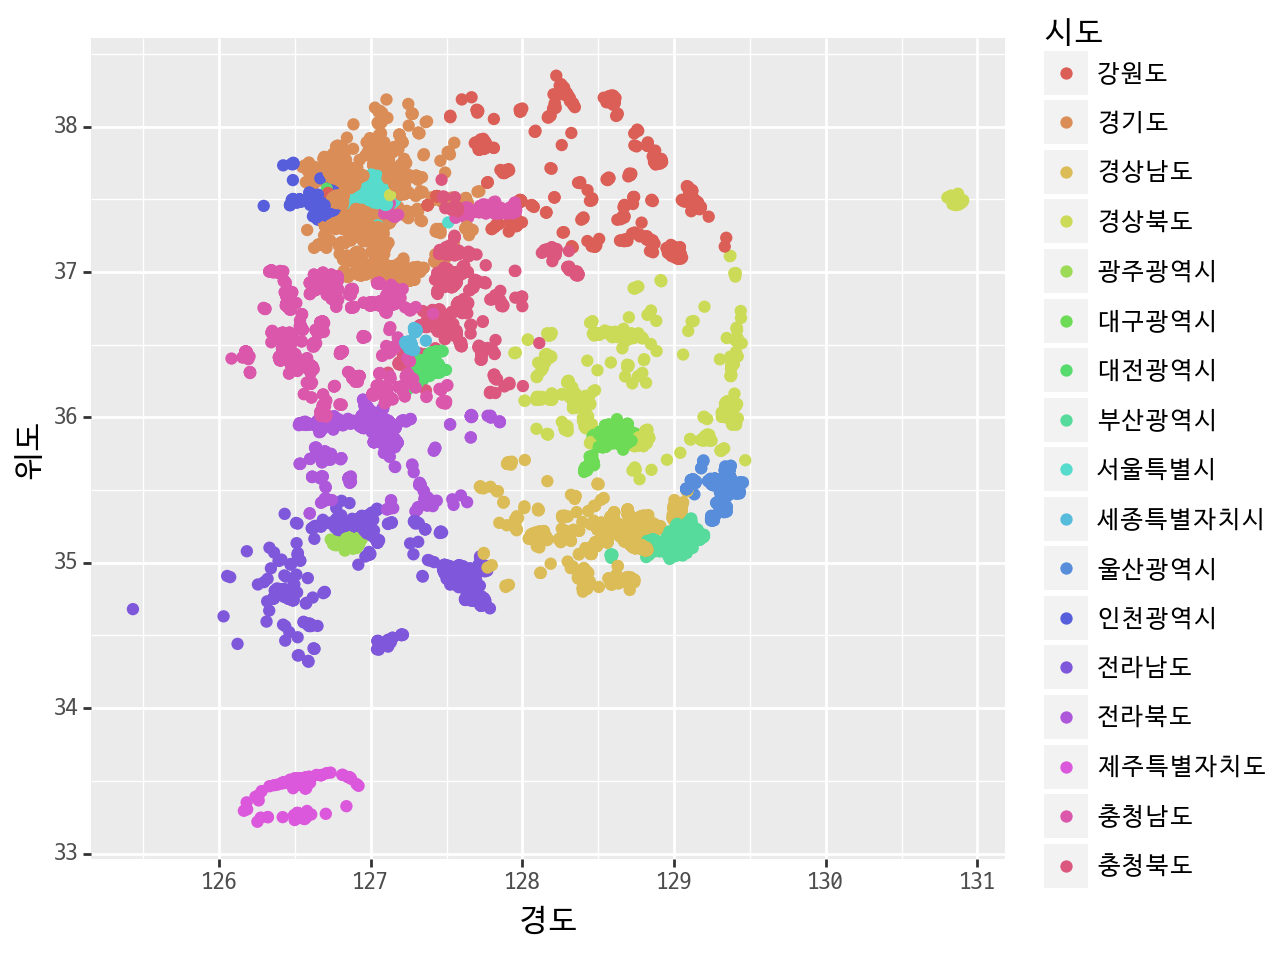

<Figure Size: (640 x 480)>

In [55]:
# 시도별 시각화
(ggplot(park)
 + aes(x='경도', y='위도', color='시도')
 + geom_point()
 + theme(text=element_text(family='D2Coding'))
)

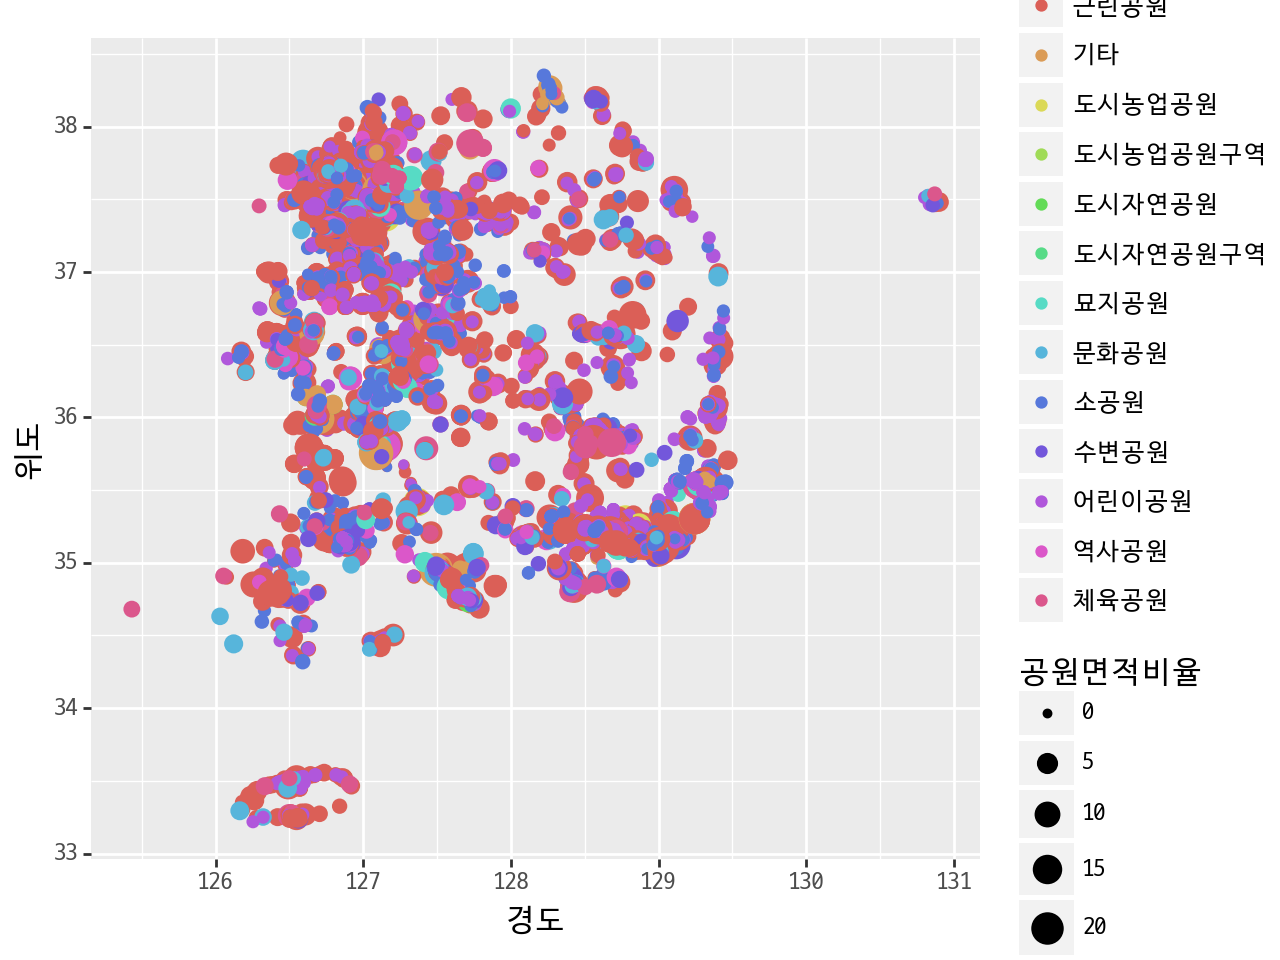

<Figure Size: (640 x 480)>

In [57]:
# 공원구분
(ggplot(park)
 + aes(x='경도', y='위도', color='공원구분', size='공원면적비율')
 + geom_point()
 + theme(text=element_text(family='D2Coding'))
)

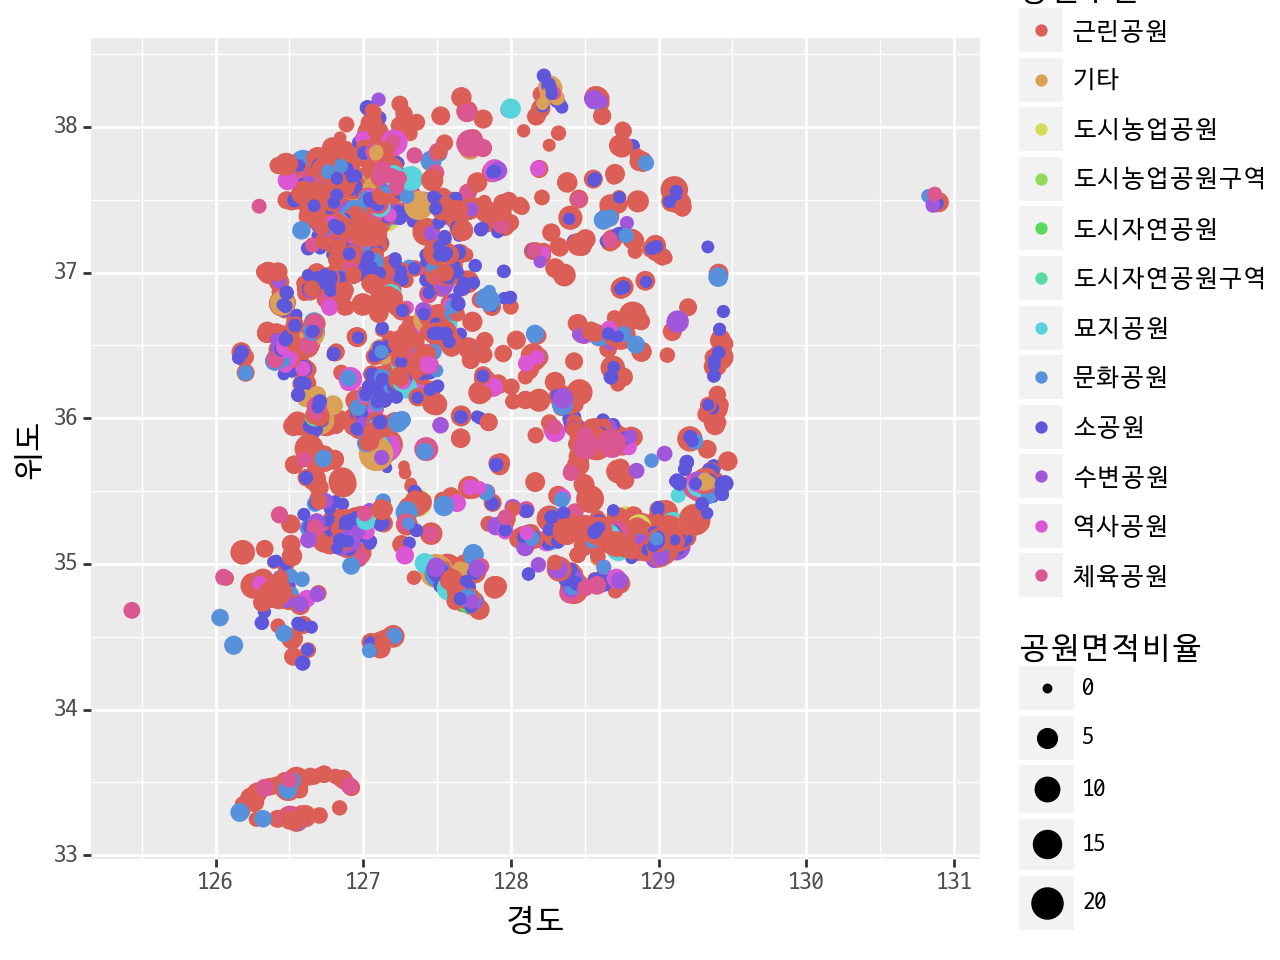

<Figure Size: (640 x 480)>

In [59]:
# 어리이공원구분
(ggplot(park[park.공원구분 != '어린이공원'])
 + aes(x='경도', y='위도', color='공원구분', size='공원면적비율')
 + geom_point()
 + theme(text=element_text(family='D2Coding'))
)

In [66]:
# 공원이 가장 많은 시도는?(Bar)
park_sido = pd.DataFrame(park.시도.value_counts())
park_sido_normalize =  pd.DataFrame(park.시도.value_counts(normalize=True))
park_sido_normalize
park_sido = park_sido.merge(park_sido_normalize, left_index=True, right_index=True).reset_index()
park_sido.columns = ['시도', '합계', '비율']
park_sido.sort_values(by='합계', ascending=True)

,시도,합계,비율
16,세종특별자치시,70,0.004349
15,제주특별자치도,245,0.015222
14,광주광역시,362,0.022491
13,대전광역시,384,0.023858
12,인천광역시,507,0.031500
11,부산광역시,530,0.032929
10,대구광역시,580,0.036036
9,강원도,724,0.044983
8,경상북도,785,0.048773
7,울산광역시,833,0.051755


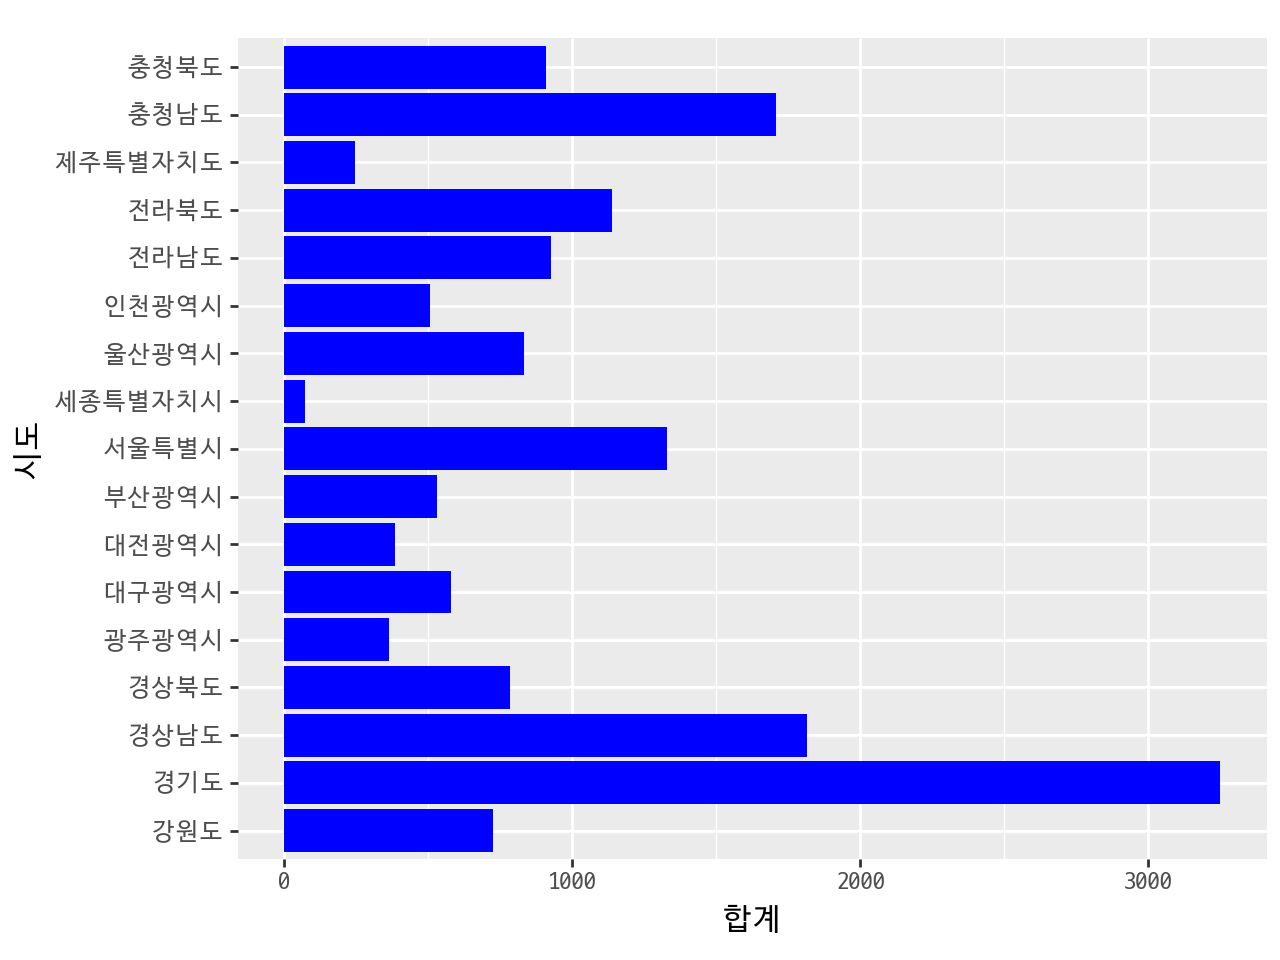

<Figure Size: (640 x 480)>

In [70]:
(ggplot(park_sido.sort_values(by='합계', ascending=True))
 + aes(x='시도', y='합계')
 + geom_bar(stat='identity', fill='blue', position='dodge')
 + coord_flip() 
 + theme(text=element_text(family='D2Coding'))
)

In [71]:
# 실습 공원구분별 어떤 공원이 가장많은지?
park_type = pd.DataFrame(park.공원구분.value_counts()).reset_index()
park_type.columns = ['공원구분', '합계']
park_type

,공원구분,합계
0,어린이공원,8999
1,근린공원,3800
2,소공원,2209
3,문화공원,257
4,수변공원,242
5,체육공원,208
6,기타,180
7,역사공원,143
8,묘지공원,40
9,도시농업공원,10


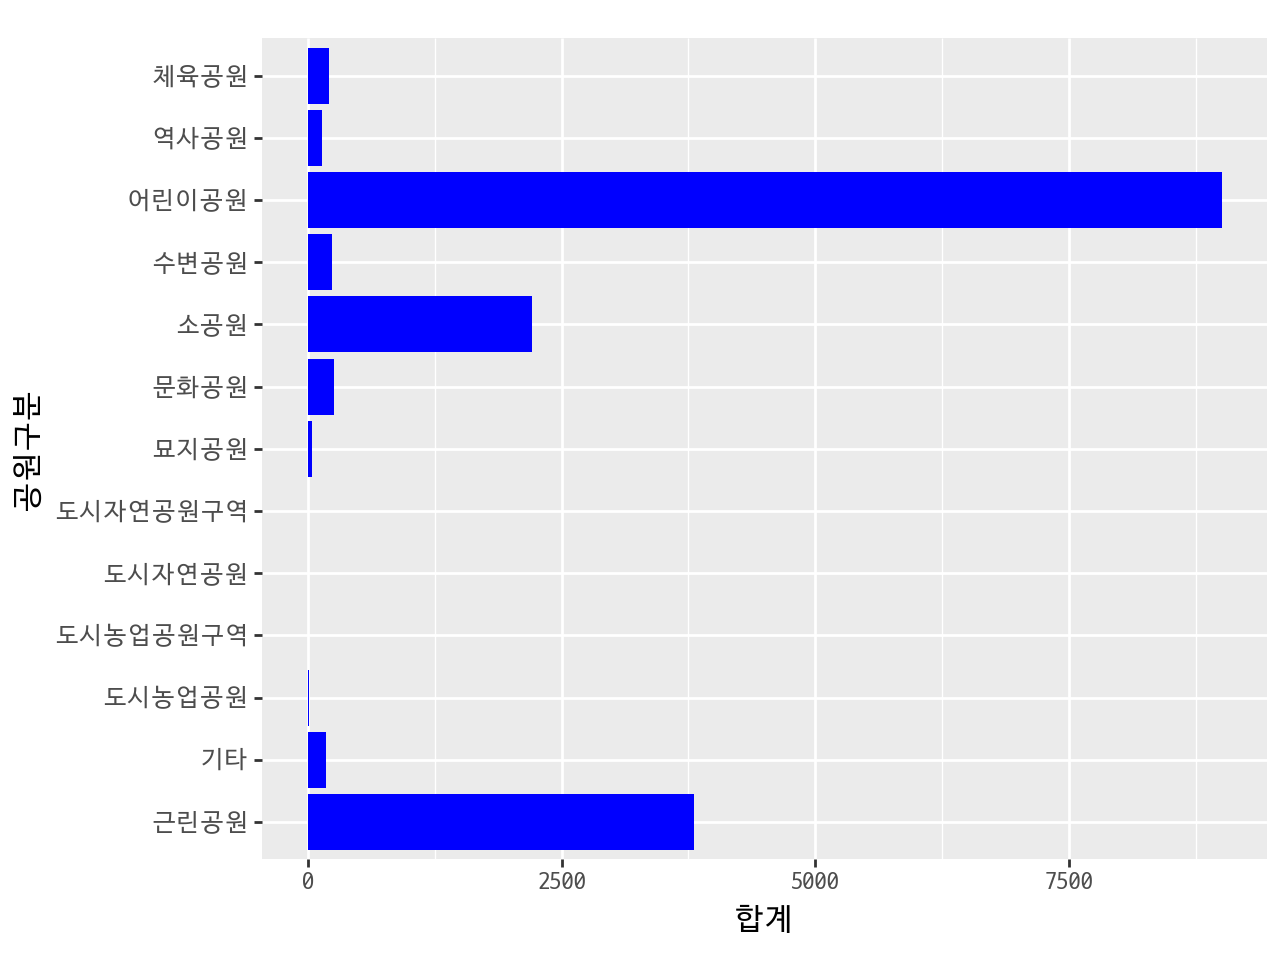

<Figure Size: (640 x 480)>

In [72]:
(ggplot(park_type)
 + aes(x='공원구분', y='합계')
 + geom_bar(stat='identity', fill='blue', position='dodge')
 + coord_flip() 
 + theme(text=element_text(family='D2Coding'))
)

In [73]:
import folium
import json

m = folium.Map(
    location=[37.5838699,127.0565831],
    zoom_start=10
)

with open('../data/seoul_municipalities_geo.json', 'rt', encoding='UTF-8') as f:
    geo = json.loads(f.read())
    
# geo
folium.GeoJson(
    geo,
    name='seoul_municipalities'
).add_to(m)
m.save('../data/seoul_map.html')
m